## Übung

Im folgenden wollen wir einen einfachen Datensatz mit den bisher gezeigten Funktionen untersuchen - wir nutzen folgenden Datensatz:

In [1]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

Importieren Sie pandas und numpy und laden Sie das Titanic-Dataset als DataFrame

    pd.read_csv...

Dabei soll die Spalte `PassenderId` als Index verwendet werden.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(url, index_col="PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Wieviele Personen haben überlebt? Wie war die Überlebenswahrscheinlichkeit?
died, survived = df.Survived.value_counts()

print("überlebt:", survived, "von", df.Survived.count())
print("Rate:", f"{survived / (died+survived):.2f}") # Python 3 f-String

überlebt: 342 von 891
Rate: 0.38


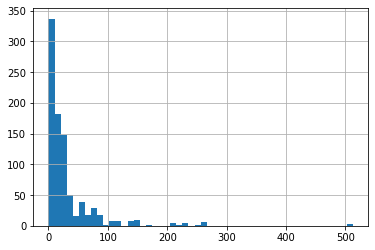

In [5]:
# erzeugen Sie ein Histogramm der gezahlten Ticketpreise
df.Fare.hist(bins=50);

In [6]:
# Wieviele Kinder unter 12 waren an Board? Wie viele haben davon überlebt?
print(df[df.Age < 12].shape[0])
print(df[(df.Age < 12) & (df.Survived == 1)].shape[0])

# oder df[df.Age < 12].Survived.value_counts()

68
39


In [7]:
# Wieviele Personen hiessen "Allen"?
df[df.Name.str.contains('Allen')]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S


In [8]:
# Waren die Frauen oder die Männer im Schnitt älter? Tipp: groupby und Aggregation
df.groupby('Sex')['Age'].agg('mean')

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [9]:
# Wer hatte eine höhere Überlebenswahrscheinlichkeit - Verheiratete oder unverheiratete Frauen?
females = df[df.Sex == 'female'].copy()
females['married'] = females.Name.str.contains('Mrs')
females.groupby('married')['Survived'].agg('mean')

married
False    0.708108
True     0.790698
Name: Survived, dtype: float64

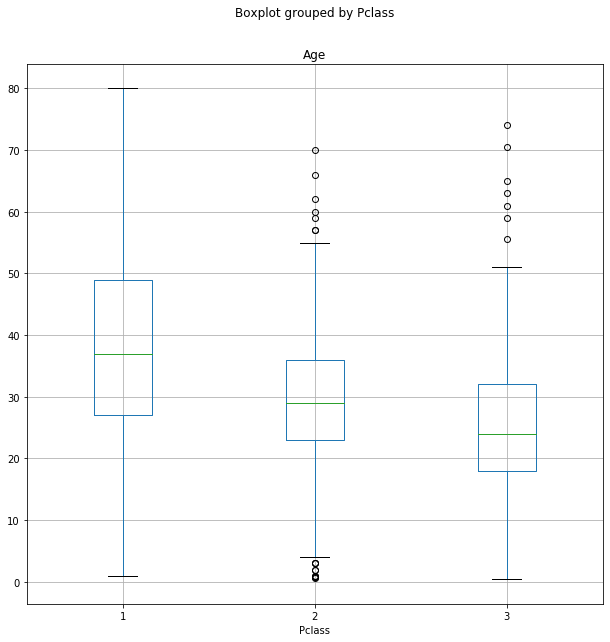

In [10]:
# Zeichnen Sie drei Boxplots - Altersverteilungen in Klasse 1, 2 und 3
df.boxplot(column='Age', by='Pclass', figsize=(10,10));

In [11]:
# Geben Sie eine Pivot-Tabelle aus: Überlebenswahrscheinlichkeit nach Geschlecht und Passagierklasse
df.pivot_table('Survived', columns='Pclass')

Pclass,1,2,3
Survived,0.62963,0.472826,0.242363


In [12]:
# Berechnen Sie eine Einteilung in Kinder / Erwachsener / Senior (0-18, 18-65, 65-100)
# Tipp: Nutzen Sie pd.cut
age = pd.cut(df['Age'], [0, 18, 65, 100])
age.head()

PassengerId
1    (18, 65]
2    (18, 65]
3    (18, 65]
4    (18, 65]
5    (18, 65]
Name: Age, dtype: category
Categories (3, interval[int64]): [(0, 18] < (18, 65] < (65, 100]]

In [13]:
# Mit unserem Cut können wir die Pivottabelle noch detaillierter anzeigen:
# Überlebenswahrscheinlichkeit nach (Geschlecht, Alter) und  Passagierklasse
df.pivot_table('Survived', ['Sex', age], 'Pclass')

Pclass                   1         2         3
Sex    Age                                    
female (0, 18]    0.909091  1.000000  0.511628
       (18, 65]   0.972973  0.900000  0.423729
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 65]   0.380435  0.073171  0.135000
       (65, 100]  0.250000  0.000000  0.000000